# 로지스틱 회귀

#### 시그모이드 함수

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

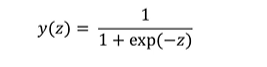

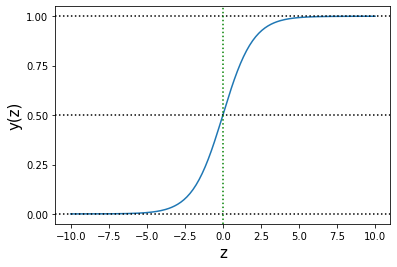

In [9]:
#### 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
y = sigmoid(z)

plt.plot(z, y)
plt.axhline(y=0, linestyle=':', color='k')
plt.axhline(y=0.5, linestyle=':', color='k')
plt.axhline(y=1, linestyle=':', color='k')
plt.axvline(x=0, linestyle=':', color='g')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1])
plt.xlabel('z', fontsize=15)
plt.ylabel('y(z)', fontsize=15);

# 1. Logistic Regression : 악성종양 판단, 2진 분류

#### 1. 데이터 수집하기

In [10]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

#### 2. 데이터 탐색하기

In [11]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [12]:
b_cancer.feature_names #30개

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
#데이터프레임으로 전환하고, 타겟(class) 추가
b_cancer_df = pd.DataFrame(data=b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [16]:
b_cancer_df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [17]:
b_cancer_df.shape

(569, 31)

In [18]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 데이터 준비, 분할 및 표준화(스케일링)하기

In [21]:
from sklearn.model_selection import train_test_split

X = b_cancer.data
y = b_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                     random_state=0 )
                                        
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 스케일링 전 X_train
round(pd.DataFrame(X_train).describe(), 3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,...,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,14.186,19.193,92.336,661.859,0.096,0.104,0.089,0.049,0.181,0.063,...,16.360,25.535,107.736,894.247,0.133,0.253,0.269,0.115,0.289,0.084
std,3.599,4.190,24.769,366.558,0.014,0.051,0.078,0.039,0.028,0.007,...,4.965,6.147,34.461,597.854,0.023,0.154,0.193,0.066,0.063,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.710,16.032,75.310,420.350,0.087,0.067,0.030,0.021,0.162,0.058,...,13.052,20.865,84.122,516.425,0.116,0.149,0.119,0.065,0.248,0.071
50%,13.310,18.725,86.140,548.450,0.096,0.094,0.063,0.034,0.179,0.062,...,14.915,25.155,97.455,682.000,0.132,0.216,0.230,0.099,0.281,0.080
75%,15.772,21.598,104.475,779.125,0.105,0.129,0.129,0.075,0.195,0.066,...,19.005,29.452,125.775,1093.250,0.145,0.329,0.379,0.161,0.318,0.092
max,28.110,33.810,188.500,2501.000,0.145,0.311,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.105,0.290,0.664,0.208


In [22]:
# 스케일링 후 X_train_scaled(평균, 표준편차))
round(pd.DataFrame(X_train_scaled).describe(), 3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,...,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.005,-2.266,-1.962,-1.416,-3.155,-1.662,-1.138,-1.263,-2.666,-1.851,...,-1.700,-2.201,-1.666,-1.187,-2.672,-1.473,-1.391,-1.756,-2.094,-1.599
25%,-0.689,-0.755,-0.688,-0.660,-0.700,-0.731,-0.748,-0.735,-0.684,-0.724,...,-0.667,-0.761,-0.686,-0.633,-0.707,-0.683,-0.774,-0.761,-0.652,-0.683
50%,-0.244,-0.112,-0.250,-0.310,-0.032,-0.197,-0.335,-0.399,-0.055,-0.136,...,-0.291,-0.062,-0.299,-0.355,-0.012,-0.244,-0.200,-0.249,-0.130,-0.203
75%,0.442,0.575,0.491,0.320,0.642,0.484,0.512,0.652,0.525,0.451,...,0.533,0.638,0.524,0.333,0.555,0.493,0.571,0.702,0.459,0.454
max,3.874,3.493,3.887,5.024,3.470,4.068,4.330,3.874,4.400,5.077,...,3.969,3.910,4.168,5.627,3.923,5.243,4.334,2.669,5.912,6.902


#### 로지스틱 모델 구축

In [25]:
from sklearn.linear_model import LogisticRegression

#1)모델 생성
reg = LogisticRegression(max_iter=1000, solver='liblinear')
#2) 모델 훈련
reg.fit(X_train_scaled, y_train)
#3) 평가 데이터에 대한 예측 수행
y_pred = reg.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [26]:
reg.predict_proba(X_test_scaled)

array([[9.98597859e-01, 1.40214060e-03],
       [4.00630635e-02, 9.59936936e-01],
       [1.36935712e-03, 9.98630643e-01],
       [1.03808036e-02, 9.89619196e-01],
       [2.93377240e-04, 9.99706623e-01],
       [5.95833935e-03, 9.94041661e-01],
       [1.71631185e-04, 9.99828369e-01],
       [1.72815018e-03, 9.98271850e-01],
       [8.33315545e-05, 9.99916668e-01],
       [2.32062850e-06, 9.99997679e-01],
       [1.93884681e-01, 8.06115319e-01],
       [7.44326071e-02, 9.25567393e-01],
       [1.66364764e-05, 9.99983364e-01],
       [4.65963682e-01, 5.34036318e-01],
       [4.13101681e-01, 5.86898319e-01],
       [9.95808682e-01, 4.19131789e-03],
       [6.06373219e-03, 9.93936268e-01],
       [9.99995286e-01, 4.71408488e-06],
       [9.99903547e-01, 9.64529494e-05],
       [9.99999996e-01, 4.06553597e-09],
       [9.98471063e-01, 1.52893737e-03],
       [9.79754051e-01, 2.02459490e-02],
       [1.99875107e-02, 9.80012489e-01],
       [1.26668781e-03, 9.98733312e-01],
       [9.990956

In [ ]:
np.set_printoptions(suppress=True)
# 확률 확인
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba)
np.set_printoptions(suppress=False)

In [32]:
# 회귀 계수 확인
print(reg.coef_)
print(b_cancer.feature_names)

[[-0.2838817  -0.59232653 -0.2977152  -0.3674725  -0.14142747  0.41597034
  -0.66518054 -0.74198517 -0.39034879  0.04243937 -1.38060399  0.12855145
  -0.96087223 -0.9616104   0.25510426  0.9232823  -0.11160878 -0.36319948
   0.14335758  0.89183455 -0.86817895 -0.88665048 -0.75509607 -0.84566199
  -0.56048549  0.1748116  -0.83324134 -1.05998944 -0.47420656 -0.60810637]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 생성한 모델 성능 지표 확인하기

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
#오차행렬

confusion_matrix(y_test, y_pred)

array([[ 60,   3],
       [  1, 107]])

In [35]:
#정확도, 정밀도, 재현율 지표확인
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("정확도: {:.3f}".format(accuracy))
print("정밀도: {:.3f}".format(precision))
print("재현율: {:.3f}".format(recall))

정확도: 0.977
정밀도: 0.973
재현율: 0.991


# 2. Logistic Regression: 붓꽃 데이터 , 다중 분류

#### 데이터 수집하기

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()

#### 데이터 탐색하기

In [37]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 

iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#데이터셋의 크기, 독립변수 X의 피처 정보 확인

In [40]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [42]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

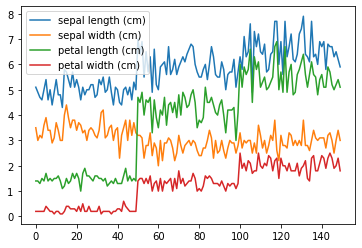

In [43]:
iris_df.plot();

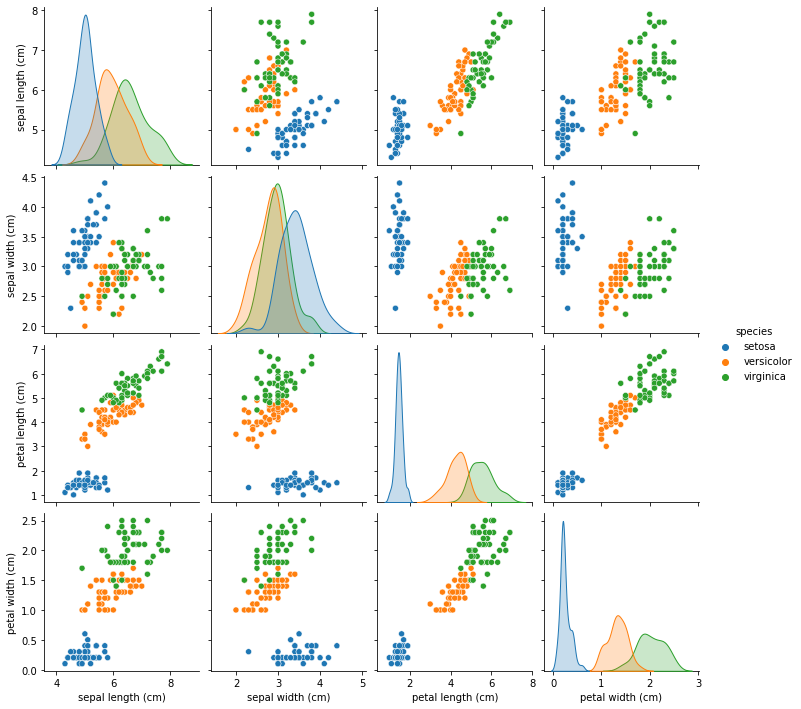

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='species');
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨

In [ ]:
# 3종류인것을 추측 가능

#### 데이터 준비, 분할, 전처리

In [47]:
# X, y 설정하기
X = iris.data
y = iris.target

# 데이터 분할: 붓꽃의 타겟 데이터가 
# 테스트 세트도 훈련 세트와 동일한 비율로 들어갈 수 있도록 
# 분할시 stratify옵션을 준다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1, \
                                                   stratify=iris.target)

# 훈련데이터, 테스트 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 로지스틱 모델 구축

In [48]:
# 로지스틱 회귀 객체 생성
# 꽃의 종류가 3가지(이진 분류가 아님, solver, multiclass option을 주는 이유)
reg = LogisticRegression(solver='lbfgs', \
                        multi_class='auto',\
                        max_iter=10000,
                        C=100, random_state=1)

reg.fit(X_train_scaled, y_train)

# 테스트 데이터를 모델에 적용하여 y_pred 구하기
y_pred = reg.predict(X_test_scaled)
print(y_pred[:10])


[2 0 1 0 0 0 2 2 2 1]


In [49]:
# 확률 확인
y_pred_proba = reg.predict_proba(X_test_scaled)
print(np.round(y_pred_proba[:10],3))

[[0.    0.    1.   ]
 [0.999 0.001 0.   ]
 [0.027 0.973 0.   ]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.004 0.996]
 [0.    0.01  0.99 ]
 [0.    0.988 0.012]]


#### 모델의 성능 지표 확인

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

#오차행렬
print(confusion_matrix(y_test, y_pred))

#정확도
accuracy = accuracy_score(y_test, y_pred)
print("정확도: {:.3f}".format(accuracy))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
정확도: 1.000


In [ ]:
#####################################################################################################################

# 수고 많이 하셨습니다!!!!